<a href="https://colab.research.google.com/github/karishmasd/ML/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import copy
import matplotlib.pyplot as plt
%matplotlib inline


#**Data**

In [2]:
def load_data():
    data = np.loadtxt("/content/drive/MyDrive/Data/ex2data1.txt", delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y


In [3]:
X_train,y_train=load_data()

In [4]:
X_train[:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [5]:
y_train[:5]

array([0., 0., 0., 1., 1.])

In [6]:
X_train.shape

(100, 2)

In [7]:
y_train.shape

(100,)

In [8]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0

    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)



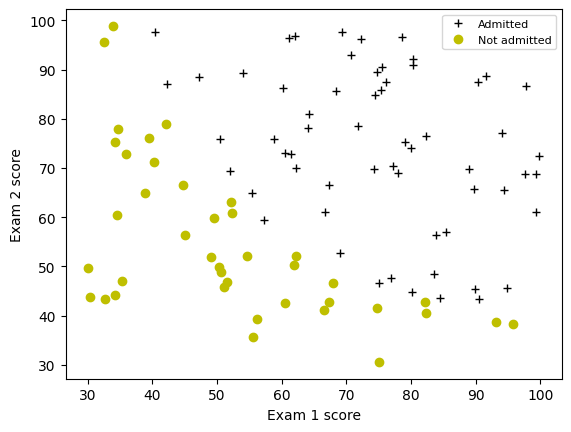

In [9]:
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.legend(loc="upper right",fontsize=8)
plt.show()

#**Sigmoid function**

In [10]:
def sigmoid(z):
  s=1/(1+np.exp(-z))
  return s

In [11]:
# checking sigmoid function we know that  sigmoid of 0 should be 0.5
check_value=0
sigmoid(check_value)

0.5

#**Cost Function for logistic Regression**

In [12]:
def compute_cost(X,y,w,b):
  total_cost=0
  m=X_train.shape[0]
  for i in range(m):
    f=np.dot(X[i],w)+b
    cost=-((y[i]*np.log(sigmoid(f)))+((1-y[i])*np.log(1-sigmoid(f))))
    total_cost+=cost
  total_cost=total_cost/m
  return total_cost

In [13]:
m, n = X_train.shape
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


#**Gradient for logistic regression**

In [ ]:
def_gradient(x,y,w,b)